In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from synthlearners.utils import prepare_panel
from synthlearners.crossvalidation import PanelCrossValidator

In [2]:
adh_data = pd.read_csv("ADH2015.csv", index_col=0)
adh_data = adh_data[['country', 'year', 'gdp']]
# manually create treatment indicator
adh_data['treat'] = np.where((adh_data.country == "West Germany") & (adh_data.year > 1990), 1, 0)
adh_data.head()

,country,year,gdp,treat
index,,,,
1.0,USA,1960.0,2879,0
1.0,USA,1961.0,2929,0
1.0,USA,1962.0,3103,0
1.0,USA,1963.0,3227,0
1.0,USA,1964.0,3420,0


In [3]:
data = prepare_panel(
    adh_data,
    unit_col="country",
    time_col="year",
    outcome_col="gdp",
    treatment_col="treat",
)

Text(0.5, 1.0, 'Treatment matrix')

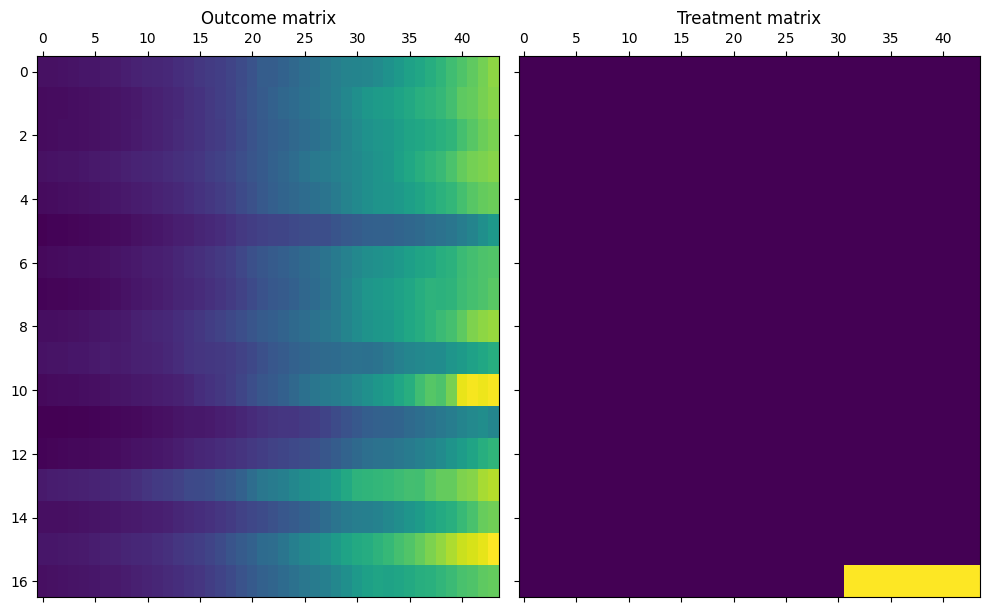

In [4]:
f, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
ax[0].matshow(data["Y"], aspect="auto", cmap="viridis")
ax[1].matshow(data["W"], aspect="auto", cmap="viridis")
f.tight_layout()
ax[0].set_title("Outcome matrix")
ax[1].set_title("Treatment matrix")

In [5]:
n_split_cnt = 4
cv = PanelCrossValidator(n_splits=n_split_cnt)

In [6]:
def plot_masks(m):
    f, ax = plt.subplots(len(m), 2, figsize=(10, 10), sharey=True)

    for n in range(len(m)):
        ax[n, 0].matshow(m[n][0], aspect="auto", cmap="viridis")
        ax[n, 1].matshow(m[n][1], aspect="auto", cmap="viridis")

    f.tight_layout()
    ax[0, 0].set_title("Train matrix")
    ax[0, 1].set_title("Test matrix")

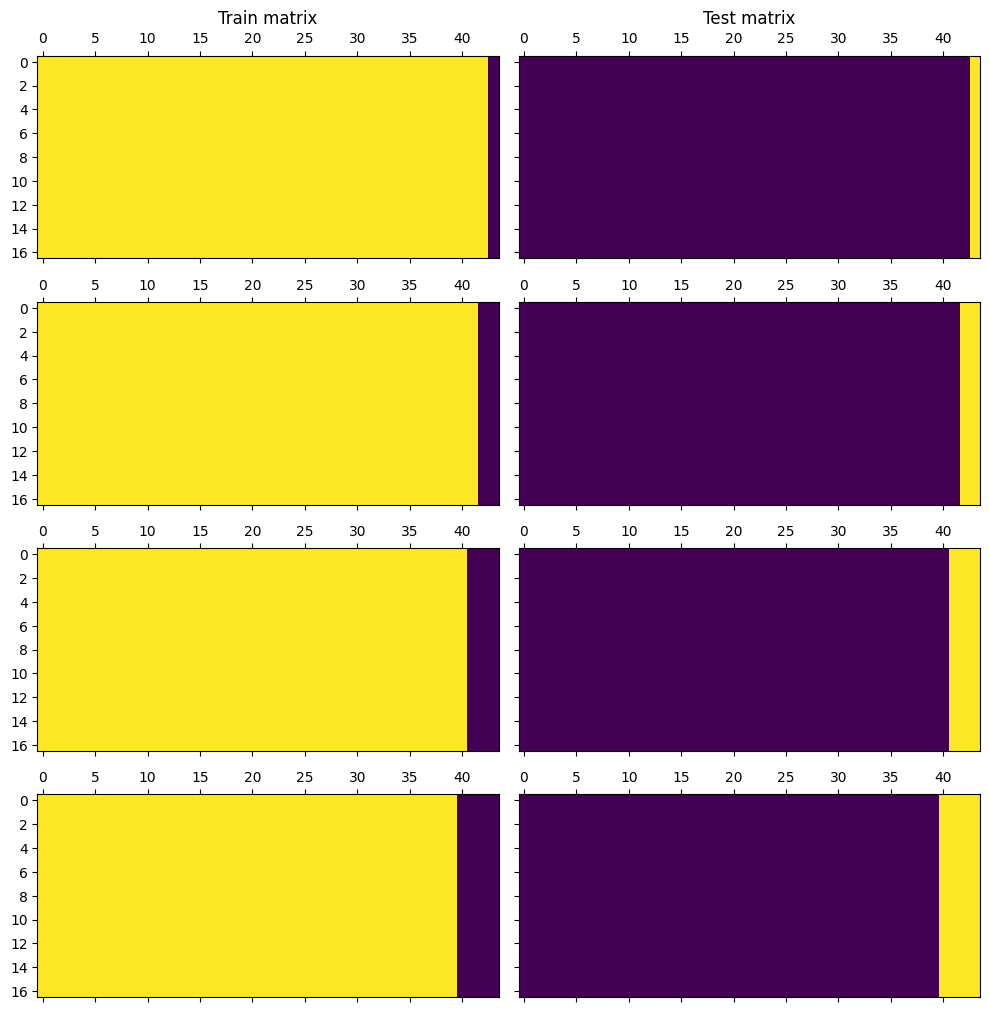

In [7]:
horizontal_masks = cv.horizontal_split(data["Y"])
plot_masks(horizontal_masks)

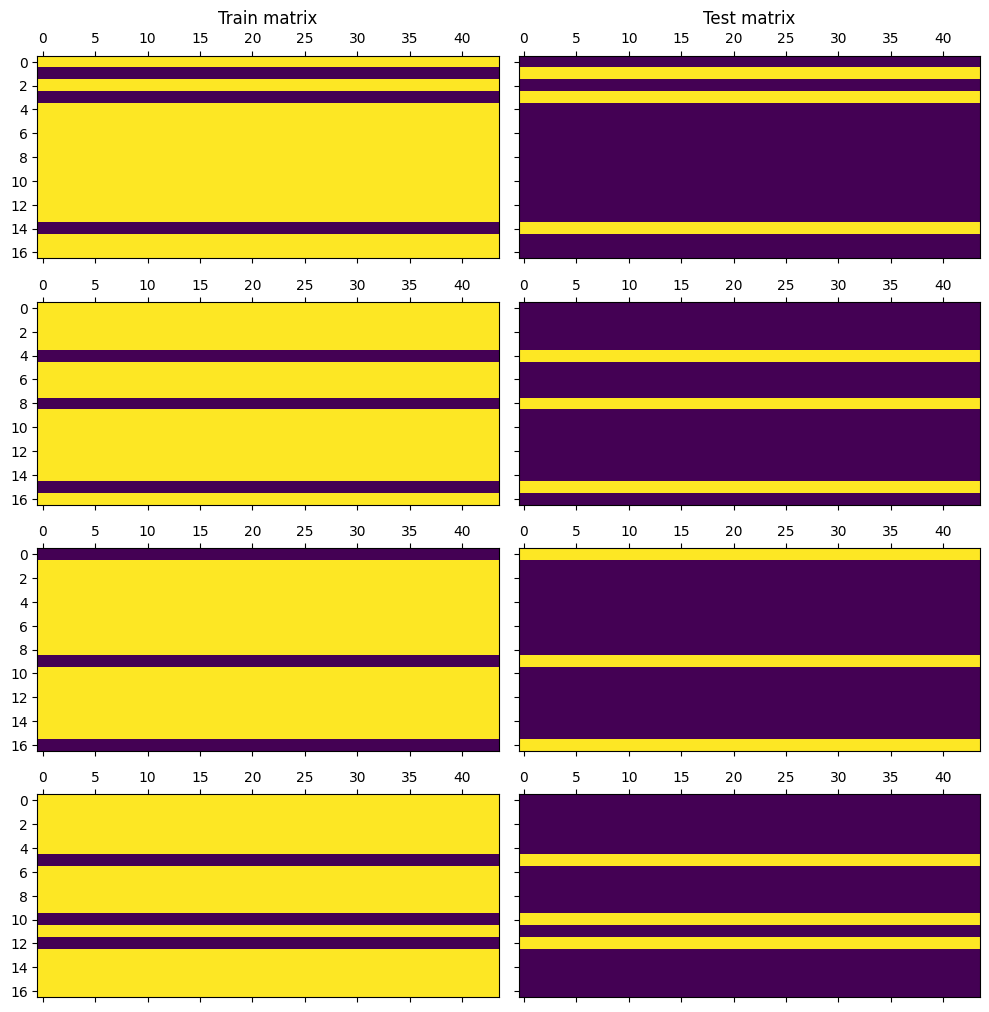

In [8]:
vertical_masks = cv.vertical_split(data["Y"])
plot_masks(vertical_masks)

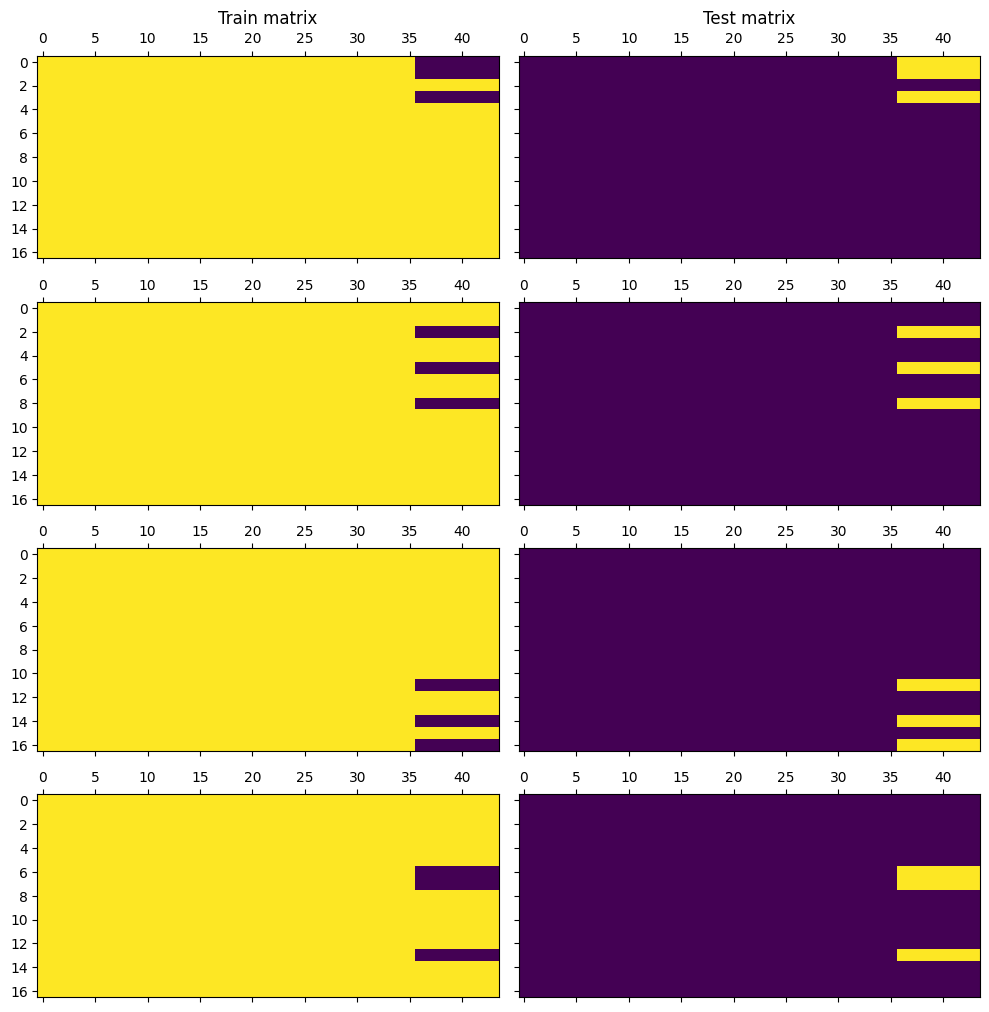

In [9]:
box_masks = cv.box_split(data["Y"])
plot_masks(box_masks)

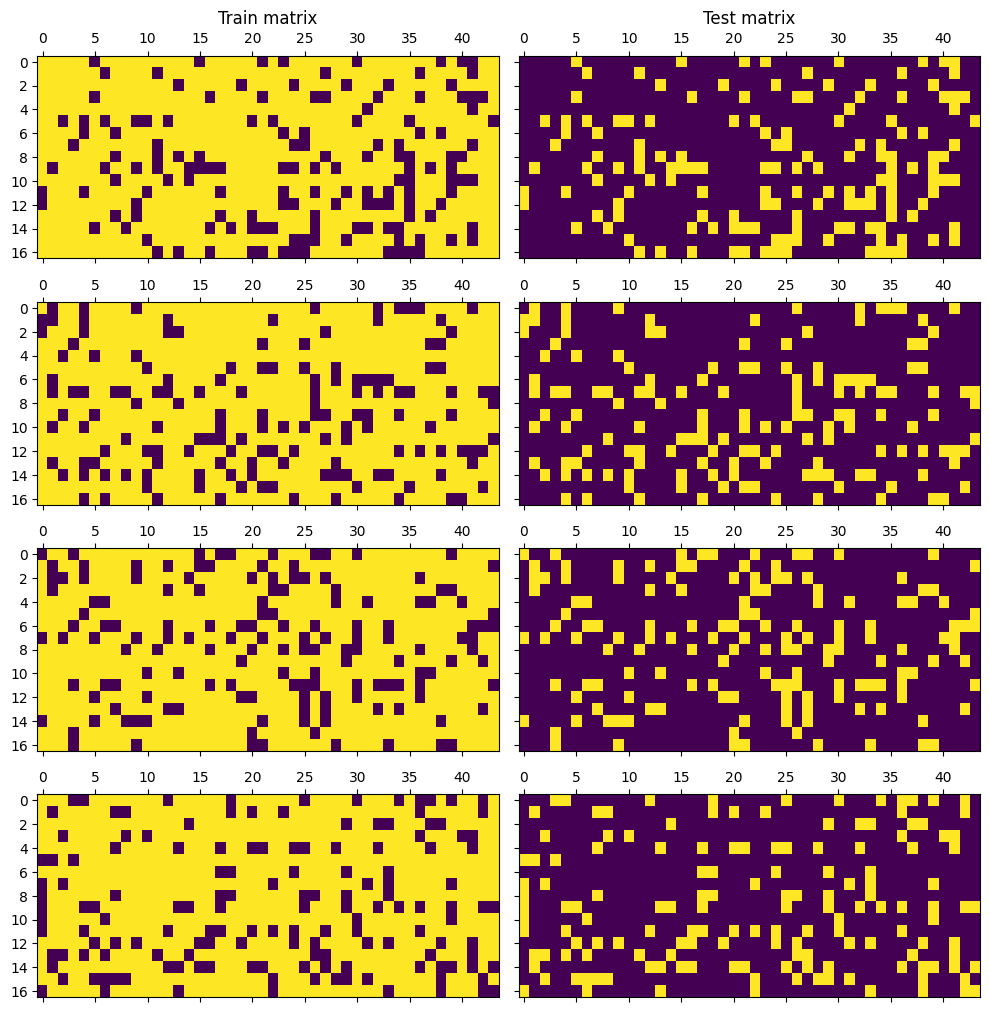

In [10]:
random_masks = cv.random_split(data["Y"])
plot_masks(random_masks)